<a href="https://colab.research.google.com/github/Jo-chana/machine_learning_practice/blob/master/chapter4_Ridge_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from sklearn.linear_model import Ridge
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(42)
m = 20
X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5
X_new = np.linspace(0, 3, 100).reshape(100, 1)

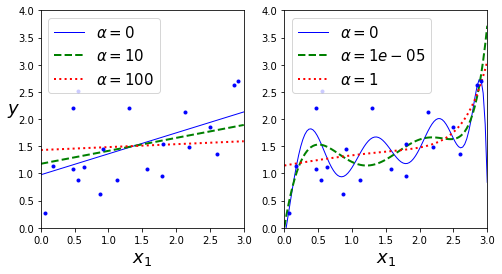

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

def plot_model(model_class, polynomial, alphas, **model_kargs):
    for alpha, style in zip(alphas, ("b-", "g--", "r:")):
        # alpha = 0 이면 선형 회귀 모델로 훈련
        model = model_class(alpha, **model_kargs) if alpha > 0 else LinearRegression()
        # polynomial 옵션 파이프라인 추가
        if polynomial:
            model = Pipeline([
                    # 데이터 확장
                    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
                    ("std_scaler", StandardScaler()), # 스케일 조정
                    ("regul_reg", model),
                ])
        model.fit(X, y)
        y_new_regul = model.predict(X_new)
        # 그래프 선 굵기 지정
        lw = 2 if alpha > 0 else 1
        plt.plot(X_new, y_new_regul, style, linewidth=lw, label=r"$\alpha = {}$".format(alpha))
    plt.plot(X, y, "b.", linewidth=3)
    plt.legend(loc="upper left", fontsize=15)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 3, 0, 4])

plt.figure(figsize=(8,4))
plt.subplot(121)
# 기본 데이터셋으로 릿지 모델 예측 
plot_model(Ridge, polynomial=False, alphas=(0, 10, 100), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
# 확장된 데이터셋으로 릿지 모델 예측
plot_model(Ridge, polynomial=True, alphas=(0, 10**-5, 1), random_state=42)

plt.show()


In [10]:
from sklearn.linear_model import Ridge
# 규제 강도 1, 숄레스키 분해 방법을 사용
ridge_reg = Ridge(alpha=1, solver="cholesky", random_state=42)
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[1.55071465]])

In [12]:
from sklearn.linear_model import SGDRegressor
# 확률적 경사 하강 모델 SGD , 규제 파라미터 penalty = 12
sgd_reg = SGDRegressor(max_iter=50, penalty="l2", tol=1e-3, random_state=42)
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([1.47012588])

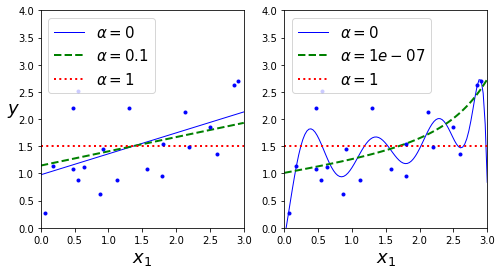

In [13]:
from sklearn.linear_model import Lasso

plt.figure(figsize=(8,4))
plt.subplot(121)
plot_model(Lasso, polynomial=False, alphas=(0, 0.1, 1), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18) 
plt.subplot(122)
# 라쏘 모델은 규제 파라미터의 영향이 매우 강력하여 중간값에 조금 더 작은 값을 사용
plot_model(Lasso, polynomial=True, alphas=(0, 10**-7, 1), tol=1, random_state=42)

plt.show()

In [15]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5) # r=0.5 Lasso, Ridge 중간
elastic_net.fit(X,y)
elastic_net.predict([[1.5]])

array([1.54333232])